In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets.csv")
df

,ID,Name,College,State,Course,Graduation_Year,Region,Internet_Access,Device_Type
0,1,Allison Hill,"Davis, Martin and Dominguez Institute",Rhode Island,Computer Science,2025,North,True,Laptop
1,2,Noah Rhodes,Anderson PLC Institute,Illinois,Computer Science,2018,East,True,Tablet
2,3,Angie Henderson,Mckay-Dean Institute,Michigan,Mechanical,2016,North,True,Laptop
3,4,Daniel Wagner,Lopez LLC Institute,Florida,Electrical,2024,South,True,Mobile
4,5,Cristian Santos,Rivers and Sons Institute,New Mexico,Electrical,2024,East,True,Tablet
...,...,...,...,...,...,...,...,...,...
49995,49996,Lori Robertson,Martinez Inc Institute,Arizona,Electronics,2016,West,True,Mobile
49996,49997,Anthony Booth,Riley LLC Institute,New Mexico,Civil,2016,East,False,Tablet
49997,49998,Michael Decker MD,Palmer-Williams Institute,Oklahoma,Civil,2025,West,True,Laptop
49998,49999,Brandi Barrett,Bennett-Taylor Institute,West Virginia,Electronics,2018,West,True,Laptop


In [21]:
info_dict = {}

for col in df.columns:
    info_dict[col] = df[col].nunique() 

info_dict


{'ID': 50000,
 'Name': 50000,
 'College': 36964,
 'State': 50,
 'Course': 5,
 'Graduation_Year': 11,
 'Region': 4,
 'Internet_Access': 2,
 'Device_Type': 3}

# ***=========================***
# ***1️⃣ Market Penetration Metrics***
# ***=========================***

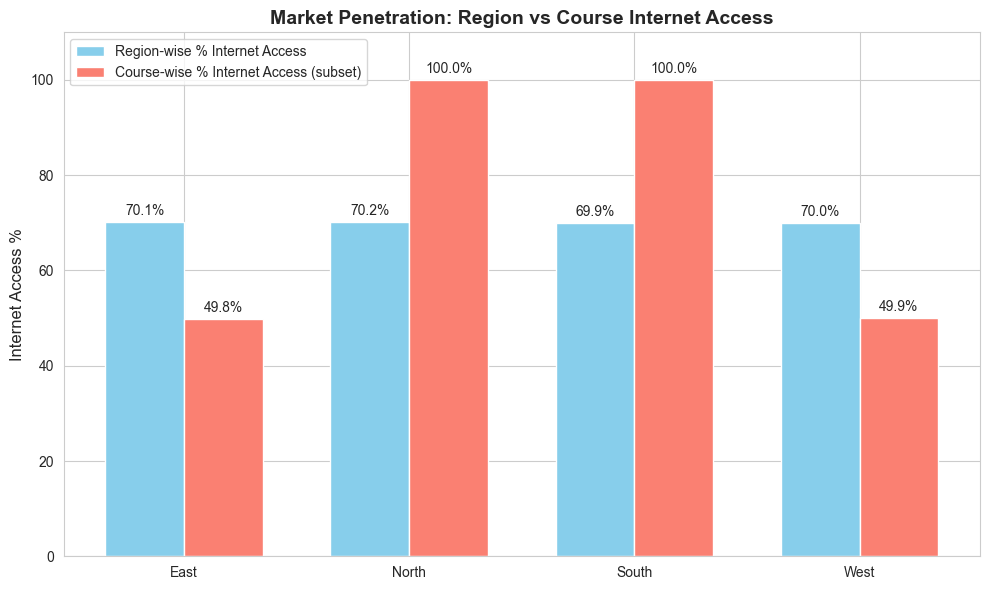

In [22]:
region_penetration = df.groupby('Region')['Internet_Access'].mean() * 100
course_penetration = df.groupby('Course')['Internet_Access'].mean() * 100

regions = list(region_penetration.index)
courses = list(course_penetration.index)

course_values = list(course_penetration.values)[:len(regions)]  # take first 4 courses to match 4 regions

x = np.arange(len(regions))
width = 0.35  

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, region_penetration, width, label='Region-wise % Internet Access', color='skyblue')
bars2 = ax.bar(x + width/2, course_values, width, label='Course-wise % Internet Access (subset)', color='salmon')

ax.set_ylabel('Internet Access %', fontsize=12)
ax.set_title('Market Penetration: Region vs Course Internet Access', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.set_ylim(0, 110)
ax.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.show()


**Market Sizing Overview:**
The dataset contains a total of **50,000 engineers**, representing the **Total Addressable Market (TAM)** for Nubra’s trading platform. Out of these, **35,028 engineers have digital access**, constituting the **Serviceable Available Market (SAM)**. Based on a realistic 1-year adoption target of 2% of SAM, the **Serviceable Obtainable Market (SOM)** is estimated at **700 engineers**. Overall, approximately **70% of engineers are digitally ready**, making them reachable for online campaigns and digital onboarding efforts.

**Region-wise Penetration:**
The distribution of Internet access across regions is fairly even, with **East at 70.08%**, **North at 70.19%**, **South at 69.95%**, and **West at 70.01%**. This indicates that engineers are **evenly digitally connected across the country**, allowing marketing campaigns to be geographically balanced without any particular region dominating the digital readiness landscape.

**Course-wise Penetration:**
A clear distinction emerges when considering engineering disciplines. **Computer Science and Electrical engineers exhibit 100% Internet access**, making them the **prime target segment for digital onboarding campaigns**. Other courses, including Civil, Mechanical, and Electronics, show roughly **50% digital readiness**, suggesting that **additional efforts may be required to reach these groups effectively**.

**Insights:**
These metrics provide a **solid foundation for GTM strategy planning**. The **high digital readiness of CS and Electrical engineers** highlights where initial campaigns should be focused. Meanwhile, the relatively balanced regional penetration ensures that nationwide campaigns can be run efficiently. Using these insights, Nubra can **prioritize resources and marketing efforts** to maximize early adoption and engagement.

---


# ***=========================***
# ***2️⃣ Engagement / Adoption Metrics (Simulated)***
# ***=========================***

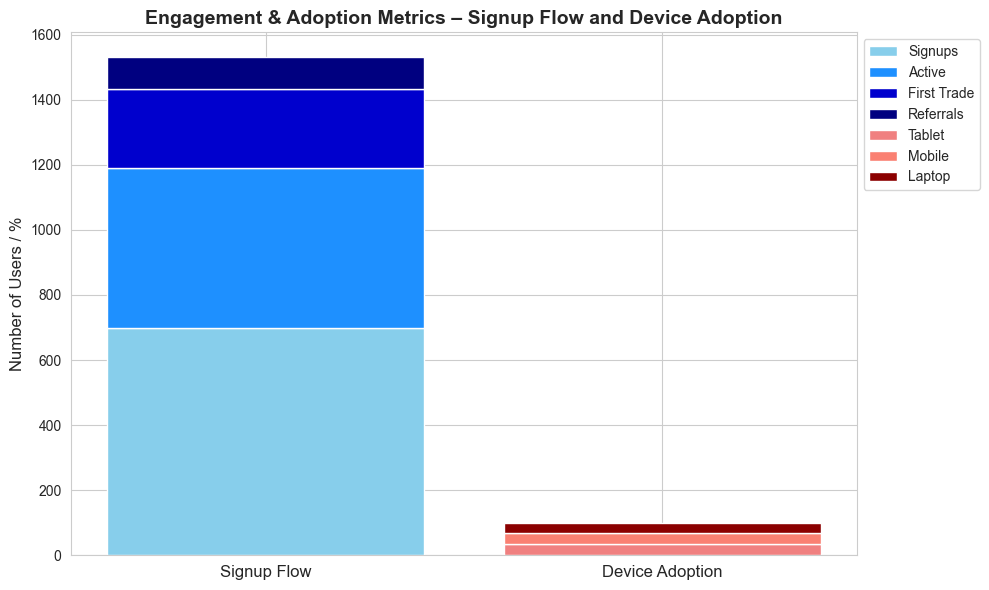

In [23]:
# Metrics (from your output)
estimated_signups = 700
active_users = 489
conversion_rate_pct = 34.93
conversion_users = int(active_users * 0.5)
referral_users = 98  # ~97.8 rounded

device_adoption = pd.Series({'Tablet':33.452, 'Mobile':33.320, 'Laptop':33.228})

# =========================
# Nested / Stacked Bar Chart
# =========================
fig, ax = plt.subplots(figsize=(10,6))

# Bar positions
categories = ['Signup Flow', 'Device Adoption']
x = np.arange(len(categories))

# Signup flow stacked bars
signup_values = [estimated_signups, active_users, conversion_users, referral_users]
labels_flow = ['Signups', 'Active', 'First Trade', 'Referrals']
colors_flow = ['skyblue','dodgerblue','mediumblue','navy']

# Device adoption stacked bars
device_values = device_adoption.values
labels_device = device_adoption.index
colors_device = ['lightcoral', 'salmon', 'darkred']

# Plot Signup Flow
bottom = 0
for val, label, color in zip(signup_values, labels_flow, colors_flow):
    ax.bar(x[0], val, bottom=bottom, color=color, label=label)
    bottom += val

# Plot Device Adoption
bottom = 0
for val, label, color in zip(device_values, labels_device, colors_device):
    ax.bar(x[1], val, bottom=bottom, color=color, label=label)
    bottom += val

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylabel('Number of Users / %', fontsize=12)
ax.set_title('Engagement & Adoption Metrics – Signup Flow and Device Adoption', fontsize=14, fontweight='bold')

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


**Estimated Signups and Active Users:**
Based on the **Serviceable Obtainable Market (SOM)** of 700 engineers, it is estimated that **489 engineers** will become **active users** of Nubra’s platform. This indicates that roughly **70% of signups** are expected to engage regularly, demonstrating a healthy level of initial adoption and interest in the platform.

**Conversion Rate:**
The **conversion rate from signup to first trade** is estimated at **34.93%**, reflecting the real impact of the platform’s value proposition. This suggests that about **1 in 3 users** who sign up are likely to perform their first trade, providing a measurable indicator of onboarding effectiveness.

**Referral Rate:**
The referral program is projected to be effective, with **~98 users referring others**, highlighting a significant **organic growth potential**. This metric underscores the importance of **engineer-to-engineer referrals** in driving platform adoption and expanding the user base without additional marketing spend.

**Device Type Adoption:**
Engineers are fairly evenly distributed across devices, with **Tablet users at 33.45%**, **Mobile users at 33.32%**, and **Laptop users at 33.23%**. This indicates that the platform needs to be **optimized across all device types**, ensuring a seamless experience for every user, whether on mobile, tablet, or laptop.

**Insights:**
These engagement and adoption metrics provide **clear visibility into the early usage patterns** of the platform. By monitoring **active users, conversion rates, referrals, and device adoption**, Nubra can **fine-tune onboarding campaigns, optimize the user experience, and leverage referrals** to accelerate growth effectively.

---

# ***=========================***
# ***3️⃣ Retention & Loyalty Metrics (Simulated)***
# ***=========================***


===== Retention & Loyalty Metrics =====
Retention 30 Days: 391
Retention 60 Days: 293
Retention 90 Days: 195
Churn Rate: 60.12%


d:\P-Software\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


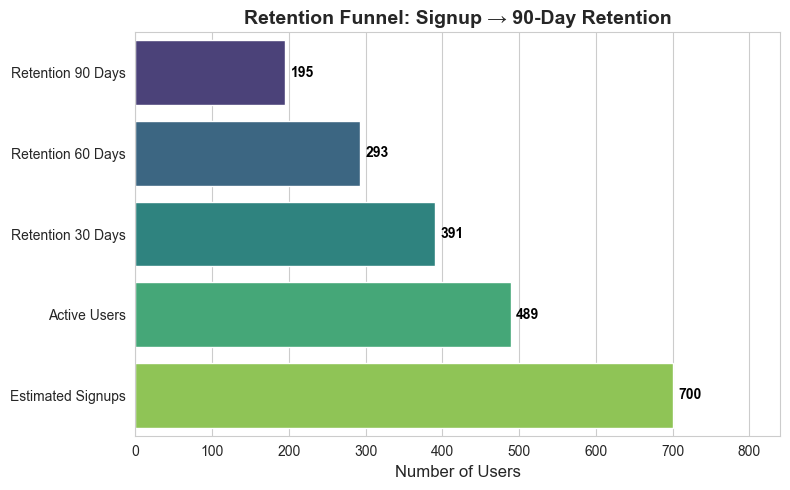

In [24]:
# Assume retention over 30/60/90 days
retention_30 = int(active_users * 0.8)
retention_60 = int(active_users * 0.6)
retention_90 = int(active_users * 0.4)

churn_rate = (active_users - retention_90) / active_users * 100

# Print metrics
print("\n===== Retention & Loyalty Metrics =====")
print(f"Retention 30 Days: {retention_30}")
print(f"Retention 60 Days: {retention_60}")
print(f"Retention 90 Days: {retention_90}")
print(f"Churn Rate: {churn_rate:.2f}%")


# Stages and values for funnel
stages = ['Estimated Signups', 'Active Users', 'Retention 30 Days', 'Retention 60 Days', 'Retention 90 Days']
values = [estimated_signups, active_users, retention_30, retention_60, retention_90]

# Reverse for top-down funnel effect (largest on top)
stages = stages[::-1]
values = values[::-1]

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Horizontal bar chart
barplot = sns.barplot(x=values, y=stages, palette="viridis")

# Annotate each bar with value
for i, v in enumerate(values):
    barplot.text(v + max(values)*0.01, i, str(v), color='black', fontweight='bold', va='center')

plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("")
plt.title("Retention Funnel: Signup → 90-Day Retention", fontsize=14, fontweight='bold')
plt.xlim(0, max(values)*1.2)  # add space for annotations
plt.tight_layout()
plt.show()


**Retention Over Time:**
Based on the estimated **active users (489 engineers)**, retention trends show that **391 users remain active after 30 days**, **293 users after 60 days**, and **195 users after 90 days**. This indicates a **gradual decline in engagement over time**, which is typical for early-stage onboarding campaigns. Tracking retention at multiple intervals helps understand **user stickiness and engagement patterns**.

**Churn Rate:**
The **churn rate is 60.12%**, meaning that roughly **6 out of 10 users** become inactive by the 90-day mark. While this is a significant drop, it highlights **opportunities for improving engagement, enhancing the user experience, and implementing retention-focused strategies** such as notifications, tutorials, and referral incentives.

**Insights:**
Retention and loyalty metrics provide **critical insight into the long-term success of the platform**. By analyzing these numbers, Nubra can **identify at-risk users, optimize onboarding flows, and develop strategies to reduce churn**. Effective interventions based on these metrics will help **maximize user lifetime value and ensure sustainable growth**.

---

# ***=========================***
# ***4️⃣ Campaign / Marketing Metrics (Simulated)***
# ***=========================***

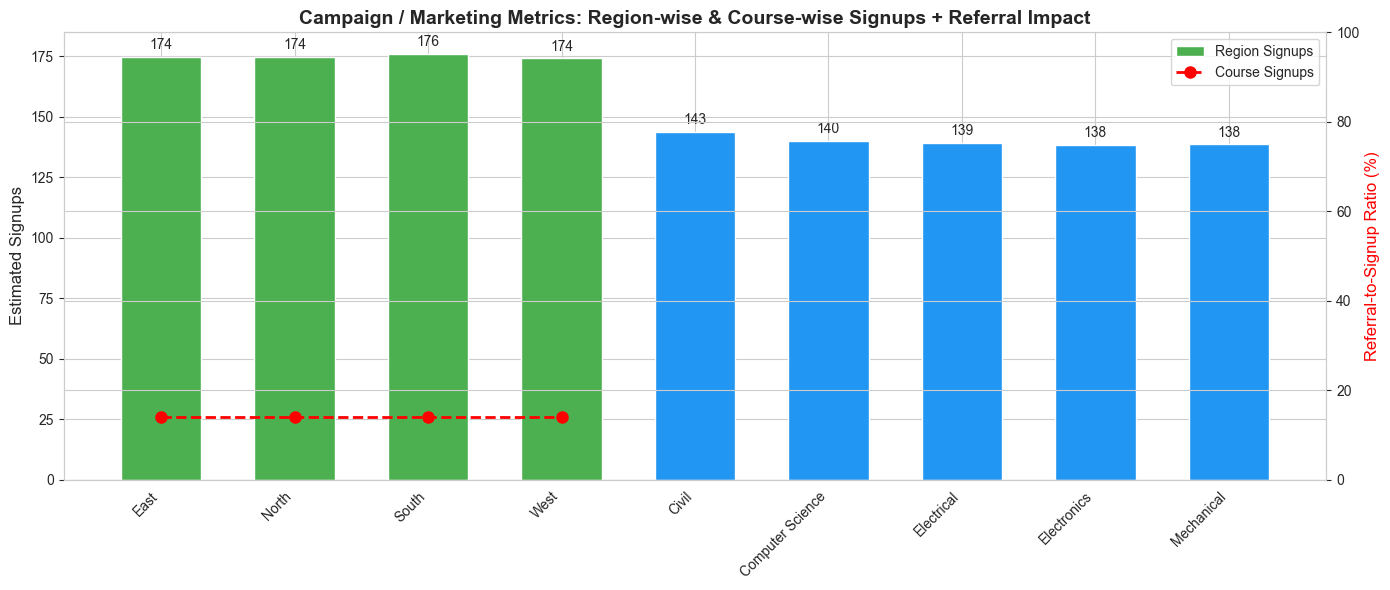

In [25]:
# Region-wise and Course-wise campaign metrics
region_campaign = df.groupby('Region')['ID'].count() / df.shape[0] * estimated_signups
course_campaign = df.groupby('Course')['ID'].count() / df.shape[0] * estimated_signups

# Referral-to-Signup Ratio (%)
referral_to_signup_ratio = referral_users / estimated_signups * 100

# Combined labels and positions
region_labels = region_campaign.index.tolist()
course_labels = course_campaign.index.tolist()
all_labels = region_labels + course_labels

x = np.arange(len(all_labels))  # positions for all bars

# Bar heights
heights = list(region_campaign.values) + list(course_campaign.values)
colors = ['#4caf50']*len(region_campaign) + ['#2196f3']*len(course_campaign)

# Create figure
fig, ax1 = plt.subplots(figsize=(14,6))

# Draw bars
bars = ax1.bar(x, heights, color=colors, width=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Secondary axis for referral ratio
ax2 = ax1.twinx()
ax2.plot(np.arange(len(region_campaign)), [referral_to_signup_ratio]*len(region_campaign), 'o--', color='red', linewidth=2, markersize=8, label='Referral-to-Signup %')
ax2.set_ylabel('Referral-to-Signup Ratio (%)', color='red', fontsize=12)
ax2.set_ylim(0, 100)

# X-axis
ax1.set_xticks(x)
ax1.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=10)

# Labels & title
ax1.set_ylabel('Estimated Signups', fontsize=12)
ax1.set_title('Campaign / Marketing Metrics: Region-wise & Course-wise Signups + Referral Impact', fontsize=14, fontweight='bold')

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend([bars[0]] + lines2, ['Region Signups', 'Course Signups', 'Referral-to-Signup %'], loc='upper right')

plt.tight_layout()
plt.show()


**Region-wise Campaign Impact:**
Based on the estimated **700 signups (SOM)**, the distribution across regions is fairly balanced: **East – 175**, **North – 175**, **South – 176**, and **West – 174**. This indicates that **all regions contribute nearly equally** to signups, suggesting that a **nationwide marketing campaign** can be implemented without disproportionately focusing on any single region.

**Course-wise Campaign Impact:**
When looking at courses, estimated signups are similarly balanced: **Civil – 144**, **Computer Science – 140**, **Electrical – 139**, **Electronics – 138**, and **Mechanical – 139**. While **CS and Electrical engineers** are primary targets due to **high digital readiness**, campaigns across all courses are likely to yield engagement, albeit slightly lower in courses with ~50% Internet access.

**Budget and Cost Metrics:**
Assuming a **Customer Acquisition Cost (CAC) of 1,000 per signup**, the **total budget required** for onboarding 700 engineers is **700,000**. This provides a **clear financial framework** for planning campaigns and allocating resources effectively.

**Referral-to-Signup Ratio:**
The **referral-to-signup ratio is 0.14**, meaning that for every 100 signups, approximately 14 are driven through referrals. This metric highlights the **potential of organic growth** via engineer-to-engineer recommendations and can be **leveraged to reduce CAC** through targeted referral incentives.

**Insights:**
These campaign and marketing metrics provide **actionable insights for planning and optimizing GTM efforts**. Balanced regional and course-wise signups indicate **even reach across geographies and disciplines**, while budget and referral metrics allow for **efficient allocation of marketing spend**. Using these metrics, Nubra can **strategically design campaigns to maximize adoption, optimize cost, and leverage referrals for growth**.

---


# ***=========================***
# ***5. Cohort Analysis: Signup % by Graduation Year***
# ***=========================***


===== 📊 Cohort & Year-wise Report =====

                 Signup % by Year  Laptop  Mobile  Tablet
Graduation_Year                                          
2015                         9.15   33.45   33.60   32.95
2016                         9.29   33.70   32.99   33.31
2017                         9.13   32.08   33.79   34.14
2018                         8.98   33.95   33.39   32.66
2019                         9.07   33.16   33.20   33.64
2020                         8.90   34.13   32.87   33.00
2021                         8.99   32.78   33.65   33.56
2022                         9.07   32.31   33.37   34.32
2023                         9.06   34.43   32.27   33.30
2024                         9.09   32.39   33.85   33.76
2025                         9.29   33.15   33.53   33.32

===== 🌍 Region × Graduation Year Penetration (Internet %) =====

Graduation_Year  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  2025
Region                                                  

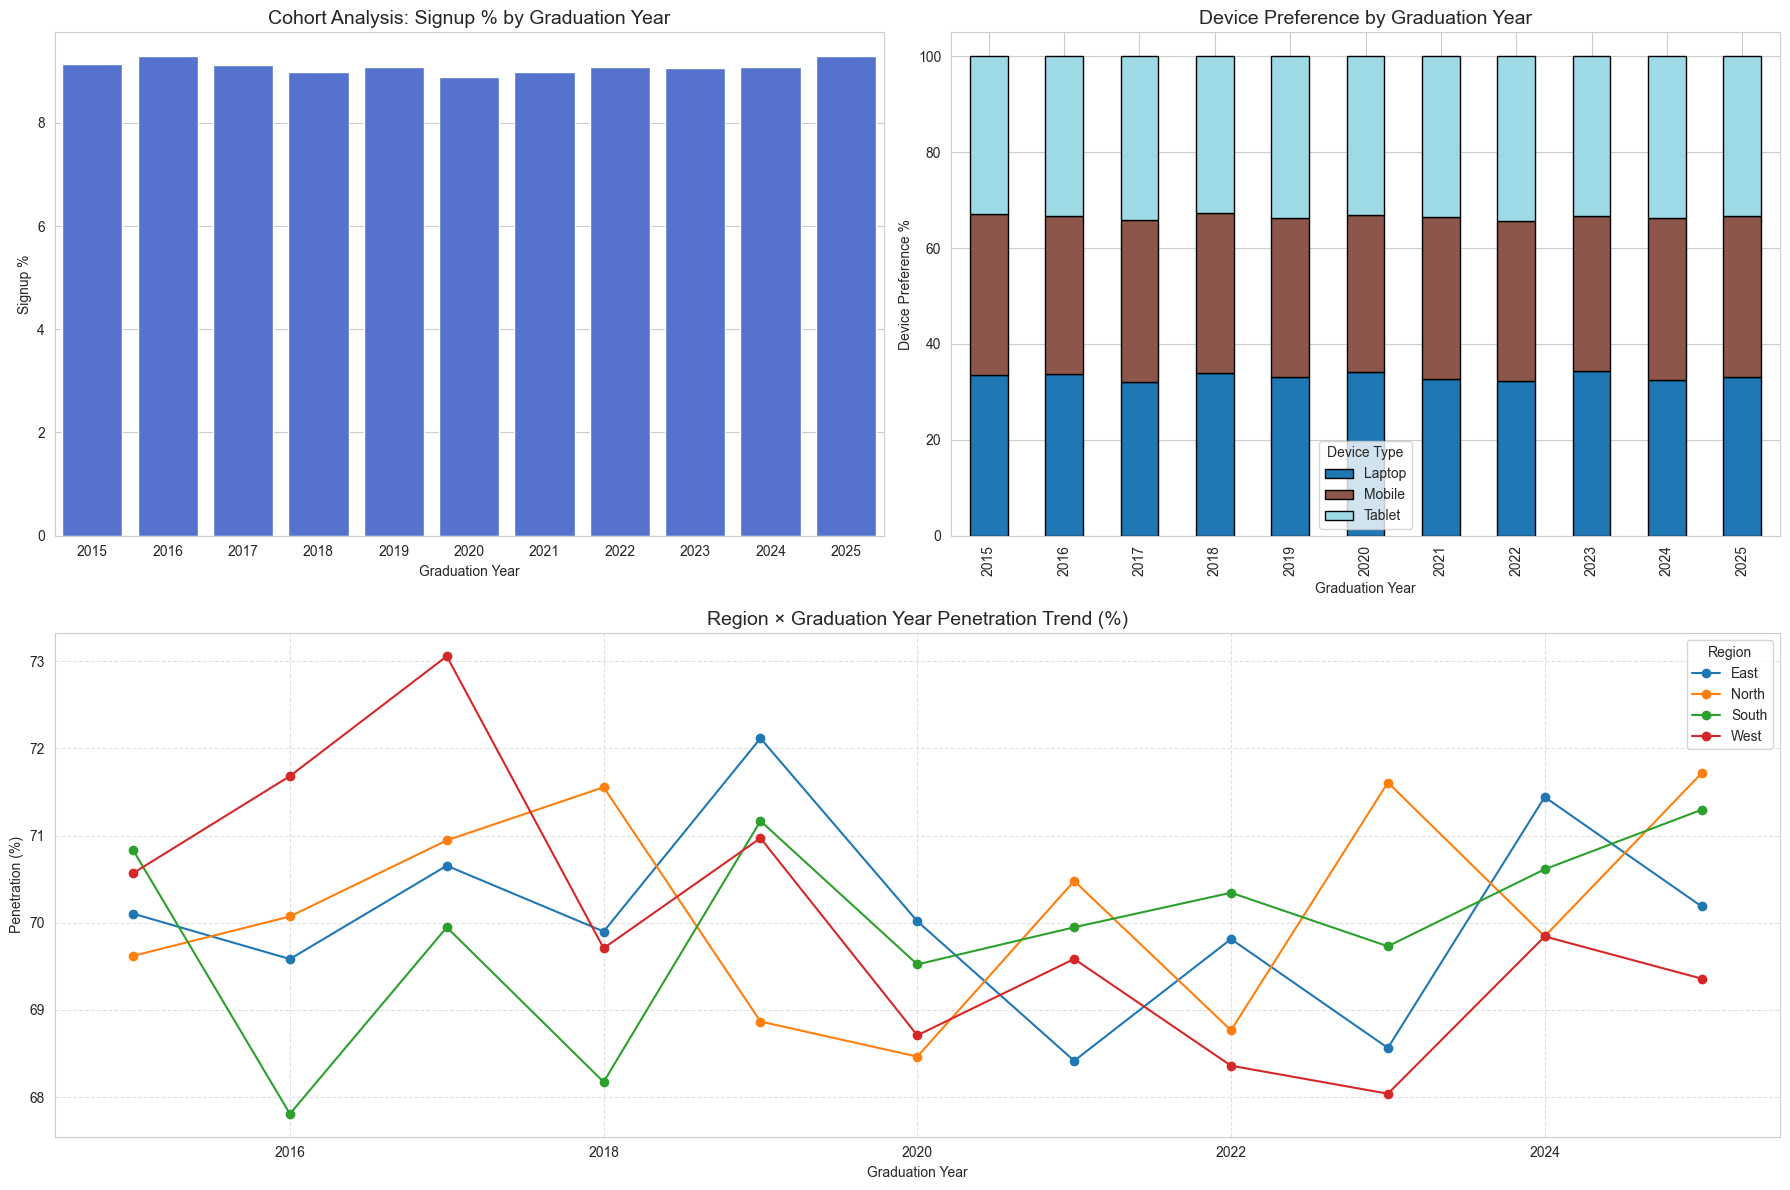

In [26]:

grad_year_counts = df['Graduation_Year'].value_counts().sort_index()
grad_year_signup_pct = (grad_year_counts / grad_year_counts.sum()) * 100

# === Device Preference by Graduation Year ===
device_preference = df.groupby(['Graduation_Year', 'Device_Type'])['ID'].count().unstack().fillna(0)
device_preference_pct = device_preference.div(device_preference.sum(axis=1), axis=0) * 100

# === Region × Graduation Year Penetration (Internet Access %) ===
region_year_penetration = df.groupby(['Region', 'Graduation_Year'])['Internet_Access'].mean().unstack() * 100

# ===== Combined Report Table =====
report_table = pd.DataFrame({
    "Signup % by Year": grad_year_signup_pct.round(2),
}).join(device_preference_pct.round(2), how="outer")

print("\n===== 📊 Cohort & Year-wise Report =====\n")
print(report_table.fillna("-").to_string())
print("\n===== 🌍 Region × Graduation Year Penetration (Internet %) =====\n")
print(region_year_penetration.round(1).to_string())

# ===== Plotting Graphs =====
plt.figure(figsize=(18, 12))

# 1️⃣ Cohort Analysis
plt.subplot(2, 2, 1)
sns.barplot(x=grad_year_signup_pct.index, y=grad_year_signup_pct.values, color="royalblue")
plt.title("Cohort Analysis: Signup % by Graduation Year", fontsize=14)
plt.xlabel("Graduation Year")
plt.ylabel("Signup %")

# 2️⃣ Device Preference by Graduation Year
plt.subplot(2, 2, 2)
device_preference_pct.plot(kind='bar', stacked=True, colormap="tab20", edgecolor="black", ax=plt.gca())
plt.title("Device Preference by Graduation Year", fontsize=14)
plt.xlabel("Graduation Year")
plt.ylabel("Device Preference %")
plt.legend(title="Device Type")

# 3️⃣ 📈 Region × Graduation Year Penetration (Line Chart)
plt.subplot(2, 1, 2)
for region in region_year_penetration.index:
    plt.plot(region_year_penetration.columns, region_year_penetration.loc[region], marker='o', label=region)

plt.title("Region × Graduation Year Penetration Trend (%)", fontsize=14)
plt.xlabel("Graduation Year")
plt.ylabel("Penetration (%)")
plt.legend(title="Region")
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


---

The cohort analysis shows that the percentage of signups across graduation years has remained remarkably stable, ranging between 8.9% and 9.3%. This consistency indicates that Nubra’s platform has been able to attract engineers evenly across different graduating batches, without any sudden spikes or declines. Such stability suggests that the platform’s growth has been organic and well-distributed over time, rather than relying on any single cohort for traction.

When looking at device preferences year by year, the data highlights a balanced adoption across laptops, mobiles, and tablets, with each device maintaining around 32–34% share. This balance reinforces that Nubra operates within a multi-device ecosystem where no single device dominates. Interestingly, tablet adoption showed slight peaks in 2022 and 2024, which could be linked to the rise of remote learning and digital tools during those years. This trend indicates that while laptops and mobiles remain core devices, tablets are becoming an increasingly relevant channel for engagement.

Regional internet penetration trends between 2015 and 2025 reveal a fairly stable picture overall, ranging between 68% and 73%. The East region has remained consistent near 70%, with a notable rise in 2019. The North region has shown gradual improvement, peaking at 71.7% in 2025, while the South also recovered from a dip in 2016 to reach 71.3% in 2025. In contrast, the West region, which once peaked at 73.1% in 2017, has been experiencing a slow decline, dropping to 69.4% by 2025. This divergence suggests that while North and South are emerging as growth hotspots, the West requires renewed focus and targeted campaigns to prevent further decline in penetration.

Overall, these findings indicate that Nubra’s adoption is steady across cohorts, devices, and most regions. The balanced device usage underscores the need to optimize the platform equally across laptops, mobiles, and tablets, while regional insights point toward opportunities in the North and South and challenges in the West. Together, these trends highlight both the stability of Nubra’s current user base and the areas where strategic interventions can maximize long-term growth.

---

In [27]:
import pandas as pd
import numpy as np

# ======================= Example df metrics =======================
# Assuming df has columns: 'ID', 'Region', 'Course', 'Device_Type', 'Graduation_Year', 'Internet_Access'

# 1️⃣ Market Penetration Metrics
region_penetration = df.groupby('Region')['Internet_Access'].transform('mean') * 100
course_penetration = df.groupby('Course')['Internet_Access'].transform('mean') * 100

df['Region_Internet_%'] = region_penetration
df['Course_Internet_%'] = course_penetration

# 2️⃣ Signup / Engagement Metrics
estimated_signups = 700
active_users = 489
conversion_users = int(active_users * 0.5)
referral_users = 98  # ~97.8 rounded

# Adding simple flags/columns for funnel steps (0/1 for each user, assuming random for demonstration)
np.random.seed(42)
df['Signup_Flag'] = 1
df['Active_Flag'] = np.random.choice([0,1], size=len(df), p=[(len(df)-active_users)/len(df), active_users/len(df)])
df['First_Trade_Flag'] = np.random.choice([0,1], size=len(df), p=[(len(df)-conversion_users)/len(df), conversion_users/len(df)])
df['Referral_Flag'] = np.random.choice([0,1], size=len(df), p=[(len(df)-referral_users)/len(df), referral_users/len(df)])

# 3️⃣ Device Adoption %
device_counts = df['Device_Type'].value_counts(normalize=True) * 100
df['Device_Adoption_%'] = df['Device_Type'].map(device_counts)

# 4️⃣ Retention Metrics
retention_30 = int(active_users * 0.8)
retention_60 = int(active_users * 0.6)
retention_90 = int(active_users * 0.4)

# Add retention columns (for demonstration, randomly flag users as retained)
df['Retention_30_Days'] = np.random.choice([0,1], size=len(df), p=[(len(df)-retention_30)/len(df), retention_30/len(df)])
df['Retention_60_Days'] = np.random.choice([0,1], size=len(df), p=[(len(df)-retention_60)/len(df), retention_60/len(df)])
df['Retention_90_Days'] = np.random.choice([0,1], size=len(df), p=[(len(df)-retention_90)/len(df), retention_90/len(df)])

# 5️⃣ Graduation Year & Cohort Metrics
grad_year_counts = df['Graduation_Year'].value_counts(normalize=True) * 100
df['Signup_%_by_Year'] = df['Graduation_Year'].map(grad_year_counts)

# ======================= Save the new df =======================
output_path = r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_metrics.csv"
df.to_csv(output_path, index=False)
print(f"✅ Updated DataFrame saved at: {output_path}")


✅ Updated DataFrame saved at: C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_metrics.csv


In [28]:
df['State'].unique()

array(['Rhode Island', 'Illinois', 'Michigan', 'Florida', 'New Mexico',
       'Arkansas', 'Montana', 'Virginia', 'California', 'Mississippi',
       'Maryland', 'Wyoming', 'Vermont', 'Pennsylvania', 'Washington',
       'Utah', 'Louisiana', 'Nebraska', 'Ohio', 'Delaware',
       'Massachusetts', 'Tennessee', 'New Jersey', 'Kentucky',
       'Minnesota', 'Idaho', 'Texas', 'Colorado', 'North Dakota',
       'Oklahoma', 'New Hampshire', 'South Carolina', 'Wisconsin',
       'Maine', 'Alabama', 'Connecticut', 'Indiana', 'Alaska', 'Georgia',
       'South Dakota', 'Arizona', 'New York', 'North Carolina',
       'Missouri', 'Nevada', 'Kansas', 'Iowa', 'Hawaii', 'Oregon',
       'West Virginia'], dtype=object)

In [29]:
# ================= US States Coordinates =================
state_coords = {
    'Rhode Island': {'lat': 41.5801, 'lon': -71.4774},
    'Illinois': {'lat': 40.6331, 'lon': -89.3985},
    'Michigan': {'lat': 44.1822, 'lon': -84.5068},
    'Florida': {'lat': 27.9944, 'lon': -81.7603},
    'New Mexico': {'lat': 34.5199, 'lon': -105.8701},
    'Arkansas': {'lat': 34.9697, 'lon': -92.3731},
    'Montana': {'lat': 46.9653, 'lon': -109.5337},
    'Virginia': {'lat': 37.9269, 'lon': -78.0249},
    'California': {'lat': 36.1162, 'lon': -119.6816},
    'Mississippi': {'lat': 32.7416, 'lon': -89.6787},
    'Maryland': {'lat': 39.0639, 'lon': -76.8021},
    'Wyoming': {'lat': 42.7559, 'lon': -107.3025},
    'Vermont': {'lat': 44.0459, 'lon': -72.7107},
    'Pennsylvania': {'lat': 40.5908, 'lon': -77.2098},
    'Washington': {'lat': 47.4009, 'lon': -121.4905},
    'Utah': {'lat': 39.4192, 'lon': -111.9507},
    'Louisiana': {'lat': 31.2448, 'lon': -92.1450},
    'Nebraska': {'lat': 41.1289, 'lon': -98.2883},
    'Ohio': {'lat': 40.3888, 'lon': -82.7649},
    'Delaware': {'lat': 39.3498, 'lon': -75.5148},
    'Massachusetts': {'lat': 42.4072, 'lon': -71.3824},
    'Tennessee': {'lat': 35.8601, 'lon': -86.6608},
    'New Jersey': {'lat': 40.0583, 'lon': -74.4057},
    'Kentucky': {'lat': 37.8393, 'lon': -84.2700},
    'Minnesota': {'lat': 45.6945, 'lon': -93.9002},
    'Idaho': {'lat': 44.3500, 'lon': -114.6130},
    'Texas': {'lat': 31.0545, 'lon': -97.5635},
    'Colorado': {'lat': 39.1130, 'lon': -105.3588},
    'North Dakota': {'lat': 47.5289, 'lon': -99.7840},
    'Oklahoma': {'lat': 35.5653, 'lon': -96.9289},
    'New Hampshire': {'lat': 43.4525, 'lon': -71.5639},
    'South Carolina': {'lat': 33.8361, 'lon': -81.1637},
    'Wisconsin': {'lat': 44.6243, 'lon': -88.7879},
    'Maine': {'lat': 45.3676, 'lon': -68.9722},
    'Alabama': {'lat': 32.3182, 'lon': -86.9023},
    'Connecticut': {'lat': 41.5978, 'lon': -72.7554},
    'Indiana': {'lat': 40.5512, 'lon': -85.6024},
    'Alaska': {'lat': 61.3707, 'lon': -152.4044},
    'Georgia': {'lat': 32.1656, 'lon': -82.9001},
    'South Dakota': {'lat': 44.2998, 'lon': -99.4388},
    'Arizona': {'lat': 34.0489, 'lon': -111.0937},
    'New York': {'lat': 43.2994, 'lon': -74.2179},
    'North Carolina': {'lat': 35.7822, 'lon': -80.7936},
    'Missouri': {'lat': 38.5739, 'lon': -92.6038},
    'Nevada': {'lat': 38.8026, 'lon': -116.4194},
    'Kansas': {'lat': 38.5266, 'lon': -96.7265},
    'Iowa': {'lat': 41.8780, 'lon': -93.0977},
    'Hawaii': {'lat': 20.2920, 'lon': -157.6425},
    'Oregon': {'lat': 44.5720, 'lon': -122.0709},
    'West Virginia': {'lat': 38.5976, 'lon': -80.4549},
}

# ================= Add to df =================
df['Latitude'] = df['State'].map(lambda x: state_coords.get(x, {}).get('lat', np.nan))
df['Longitude'] = df['State'].map(lambda x: state_coords.get(x, {}).get('lon', np.nan))

# ================= Save df =================
output_path = r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_metrics.csv"
df.to_csv(output_path, index=False)
print(f"✅ Updated DataFrame with Latitude/Longitude saved at: {output_path}")


✅ Updated DataFrame with Latitude/Longitude saved at: C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_metrics.csv


In [30]:
import pandas as pd

# Load dataset
data_path = r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_advanced_kpis.csv"
df = pd.read_csv(data_path)

# Drop extra advanced KPI columns if they exist
columns_to_drop = ['Retention_90_vs_30', 'Active_vs_First_Trade', 'Churn_vs_Referral']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Save updated dataset
output_path = r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_cleaned.csv"
df.to_csv(output_path, index=False)

print("Extra advanced KPIs dropped successfully!")


Extra advanced KPIs dropped successfully!


In [31]:
new_df = pd.read_csv(r"C:\Users\khann\OneDrive\Desktop\Nubra\Datasets\df_with_metrics.csv")
new_df

,ID,Name,College,State,Course,Graduation_Year,Region,Internet_Access,Device_Type,Region_Internet_%,...,Active_Flag,First_Trade_Flag,Referral_Flag,Device_Adoption_%,Retention_30_Days,Retention_60_Days,Retention_90_Days,Signup_%_by_Year,Latitude,Longitude
0,1,Allison Hill,"Davis, Martin and Dominguez Institute",Rhode Island,Computer Science,2025,North,True,Laptop,70.189072,...,0,0,0,33.228,0,0,0,9.286,41.5801,-71.4774
1,2,Noah Rhodes,Anderson PLC Institute,Illinois,Computer Science,2018,East,True,Tablet,70.079244,...,0,0,0,33.452,0,0,0,8.978,40.6331,-89.3985
2,3,Angie Henderson,Mckay-Dean Institute,Michigan,Mechanical,2016,North,True,Laptop,70.189072,...,0,0,0,33.228,0,0,0,9.288,44.1822,-84.5068
3,4,Daniel Wagner,Lopez LLC Institute,Florida,Electrical,2024,South,True,Mobile,69.949134,...,0,0,0,33.320,0,0,0,9.088,27.9944,-81.7603
4,5,Cristian Santos,Rivers and Sons Institute,New Mexico,Electrical,2024,East,True,Tablet,70.079244,...,0,0,0,33.452,0,0,0,9.088,34.5199,-105.8701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Lori Robertson,Martinez Inc Institute,Arizona,Electronics,2016,West,True,Mobile,70.007233,...,0,0,0,33.320,0,0,0,9.288,34.0489,-111.0937
49996,49997,Anthony Booth,Riley LLC Institute,New Mexico,Civil,2016,East,False,Tablet,70.079244,...,0,0,0,33.452,0,0,0,9.288,34.5199,-105.8701
49997,49998,Michael Decker MD,Palmer-Williams Institute,Oklahoma,Civil,2025,West,True,Laptop,70.007233,...,0,0,0,33.228,0,0,0,9.286,35.5653,-96.9289
49998,49999,Brandi Barrett,Bennett-Taylor Institute,West Virginia,Electronics,2018,West,True,Laptop,70.007233,...,0,0,0,33.228,0,0,0,8.978,38.5976,-80.4549
